### Import required libraries

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load and preprocess CIFAR-10 data

In [2]:
# Load CIFAR-10 data using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Convert datasets to numpy arrays
def convert_to_numpy(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.numpy())
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

train_data, train_labels = convert_to_numpy(trainset)
test_data, test_labels = convert_to_numpy(testset)

# Flatten images
train_data = train_data.reshape(train_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)


100%|███████████████████████| 170498071/170498071 [00:15<00:00, 10813219.28it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Training and Test Size

In [3]:
print('length of training set: ' + str(len(trainset)))
print('length of test set: ' + str(len(testset)))

length of training set: 50000
length of test set: 10000


### Preprocess Data

In [4]:
# Function to preprocess data
def preprocess_data(data):
    data = data.astype('float32')  # Ensure the data type is float32
    scaler = StandardScaler()  # Standardize features
    data = scaler.fit_transform(data)
    return data

# Preprocess the data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

### Train and Evaluate Model

In [5]:
def train_and_evaluate(C, max_iter, tol, solver, penalty, multi_class, fit_intercept, class_weight, verbose, val_size):
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=val_size, random_state=42)
    
    # Train a logistic regression model
    model = LogisticRegression(C=C, max_iter=max_iter, tol=tol, solver=solver, penalty=penalty, 
                               multi_class=multi_class, fit_intercept=fit_intercept, class_weight=class_weight, verbose=verbose)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_acc = model.score(X_train, y_train)  # Train accuracy
    val_acc = model.score(X_val, y_val)        # Validation accuracy
    test_acc = model.score(test_data, test_labels)  # Test accuracy on original 10,000 test images
    
    return model, train_acc, val_acc, test_acc

# Set hyperparameters
C = 0.001
max_iter = 10000
tol = 1e-4
solver = 'lbfgs'
penalty = 'l2'
multi_class = 'multinomial'
fit_intercept = True
class_weight = None
verbose = 1
val_size = 0.2

# Train and evaluate the model
model, train_acc, val_acc, test_acc = train_and_evaluate(C, max_iter, tol, solver, penalty, multi_class, fit_intercept, class_weight, verbose, val_size)

# Print the results
print(f'Training model with C={C}, max_iter={max_iter}, tol={tol}, solver={solver}, penalty={penalty}, multi_class={multi_class},fit_intercept={fit_intercept}, class_weight={class_weight}, verbose={verbose}...')
print('Train accuracy: ' + str(train_acc))
print('Validation accuracy: ' + str(val_acc))
print('Test accuracy: ' + str(test_acc))
print('Validation size: ' + str(val_size * 100) + '%')



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.14601D-02


 This problem is unconstrained.



At iterate   50    f=  1.66507D+00    |proj g|=  5.14862D-03

At iterate  100    f=  1.65484D+00    |proj g|=  9.41255D-04

At iterate  150    f=  1.65438D+00    |proj g|=  2.15543D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    169    177      1     0     0   9.200D-05   1.654D+00
  F =   1.6543658403833856     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Training model with C=0.001, max_iter=10000, tol=0.0001, solver=lbfgs, penalty=l2, multi_class=multinomial,fit_intercept=True, class_weight=None, verbose=1...
Train accuracy: 0.459475
Validation accuracy: 0.4146
Test accuracy: 0.4129
Val

### Plot Confusion Matrix

Confusion Matrix:
[[500  43  48  36  20  27  25  56 170  75]
 [ 56 494  26  37  19  37  37  56  73 165]
 [101  46 270  90 129  80 151  72  40  21]
 [ 41  64  97 268  61 187 134  50  32  66]
 [ 60  24 144  75 298  75 159 111  24  30]
 [ 44  44  89 158  84 352  87  76  41  25]
 [ 16  39  67 131  89  85 486  41  13  33]
 [ 39  47  59  59  97  81  43 460  36  79]
 [157  68  18  35   9  46  10  22 529 106]
 [ 68 188  19  25  17  27  53  51  80 472]]


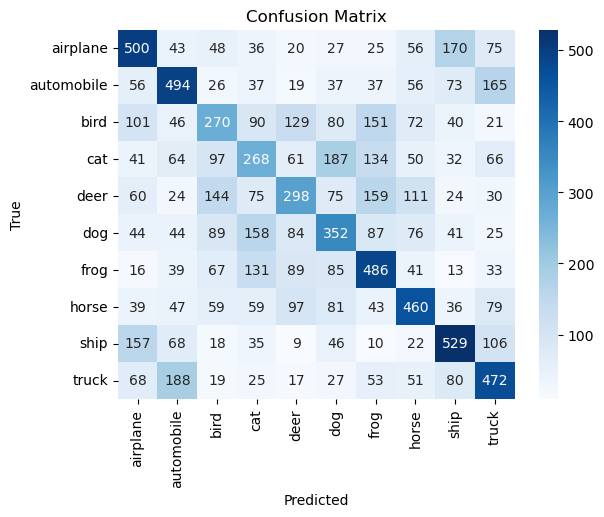

Classification Report:
              precision    recall  f1-score   support

    airplane       0.46      0.50      0.48      1000
  automobile       0.47      0.49      0.48      1000
        bird       0.32      0.27      0.29      1000
         cat       0.29      0.27      0.28      1000
        deer       0.36      0.30      0.33      1000
         dog       0.35      0.35      0.35      1000
        frog       0.41      0.49      0.44      1000
       horse       0.46      0.46      0.46      1000
        ship       0.51      0.53      0.52      1000
       truck       0.44      0.47      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



In [6]:
# Confusion Matrix
test_predictions = model.predict(test_data)
cm = confusion_matrix(test_labels, test_predictions)
print('Confusion Matrix:')
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(test_labels, test_predictions, target_names=trainset.classes)
print('Classification Report:')
print(cr)



###  Plot Learning Curve

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  8.15758D-02


 This problem is unconstrained.



At iterate   50    f=  1.64633D+00    |proj g|=  9.83020D-03

At iterate  100    f=  1.64268D+00    |proj g|=  1.35148D-03

At iterate  150    f=  1.64262D+00    |proj g|=  2.74540D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    162    170      1     0     0   9.594D-05   1.643D+00
  F =   1.6426154635170660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.31443D-02


 This problem is unconstrained.



At iterate   50    f=  1.65884D+00    |proj g|=  7.83080D-03

At iterate  100    f=  1.65566D+00    |proj g|=  1.04105D-03

At iterate  150    f=  1.65559D+00    |proj g|=  2.15554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    188    195      1     0     0   9.563D-05   1.656D+00
  F =   1.6555819553862792     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.24709D-02


 This problem is unconstrained.



At iterate   50    f=  1.65566D+00    |proj g|=  6.83300D-03

At iterate  100    f=  1.65213D+00    |proj g|=  1.40277D-03

At iterate  150    f=  1.65199D+00    |proj g|=  2.88630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    181    190      1     0     0   9.771D-05   1.652D+00
  F =   1.6519902545191691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.19914D-02


 This problem is unconstrained.



At iterate   50    f=  1.64849D+00    |proj g|=  7.60772D-03

At iterate  100    f=  1.64389D+00    |proj g|=  2.00104D-03

At iterate  150    f=  1.64369D+00    |proj g|=  3.47188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    192    198      1     0     0   9.875D-05   1.644D+00
  F =   1.6436878834236381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.09910D-02

At iterate   50    f=  1.65010D+00    |proj g|=  6.06605D-03

At iterate  100    f=  1.64434D+00    |proj g|=  1.61853D-03

At iterate  150    f=  1.64416D+00    |proj g|=  3.92911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    191    199      1     0     0   9.659D-05   1.644D+00
  F =   1.6441516448263140     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   50    f=  1.65479D+00    |proj g|=  6.09101D-03

At iterate  100    f=  1.64730D+00    |proj g|=  1.50778D-03

At iterate  150    f=  1.64710D+00    |proj g|=  4.12591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    193    201      1     0     0   8.853D-05   1.647D+00
  F =   1.6470934058757216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.05754D-02


 This problem is unconstrained.



At iterate   50    f=  1.65703D+00    |proj g|=  5.45867D-03

At iterate  100    f=  1.64869D+00    |proj g|=  1.19260D-03

At iterate  150    f=  1.64845D+00    |proj g|=  3.88081D-04

At iterate  200    f=  1.64844D+00    |proj g|=  1.03028D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    202    212      1     0     0   9.579D-05   1.648D+00
  F =   1.6484440896365449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   50    f=  1.66124D+00    |proj g|=  5.42636D-03

At iterate  100    f=  1.65295D+00    |proj g|=  9.68467D-04

At iterate  150    f=  1.65268D+00    |proj g|=  3.34624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    181    191      1     0     0   9.981D-05   1.653D+00
  F =   1.6526753427273302     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.15376D-02


 This problem is unconstrained.



At iterate   50    f=  1.66473D+00    |proj g|=  4.73570D-03

At iterate  100    f=  1.65433D+00    |proj g|=  7.79302D-04

At iterate  150    f=  1.65398D+00    |proj g|=  1.96171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    169    173      1     0     0   9.834D-05   1.654D+00
  F =   1.6539741494682669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.14678D-02


 This problem is unconstrained.



At iterate   50    f=  1.66723D+00    |proj g|=  5.12234D-03

At iterate  100    f=  1.65669D+00    |proj g|=  1.02482D-03

At iterate  150    f=  1.65625D+00    |proj g|=  2.37733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    177    187      1     0     0   8.831D-05   1.656D+00
  F =   1.6562338962874268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  8.05872D-02


 This problem is unconstrained.



At iterate   50    f=  1.60486D+00    |proj g|=  7.27100D-03

At iterate  100    f=  1.60147D+00    |proj g|=  8.60645D-04

At iterate  150    f=  1.60145D+00    |proj g|=  1.00804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    154    162      1     0     0   9.938D-05   1.601D+00
  F =   1.6014465686095916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.45059D-02


 This problem is unconstrained.



At iterate   50    f=  1.62428D+00    |proj g|=  6.46763D-03

At iterate  100    f=  1.62074D+00    |proj g|=  6.68129D-04

At iterate  150    f=  1.62068D+00    |proj g|=  1.52559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    157    162      1     0     0   9.876D-05   1.621D+00
  F =   1.6206794550922463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.39352D-02


 This problem is unconstrained.



At iterate   50    f=  1.63135D+00    |proj g|=  5.85758D-03

At iterate  100    f=  1.62755D+00    |proj g|=  1.00111D-03

At iterate  150    f=  1.62740D+00    |proj g|=  1.86867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    165    174      1     0     0   9.982D-05   1.627D+00
  F =   1.6273978491080618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.42251D-02


 This problem is unconstrained.



At iterate   50    f=  1.62828D+00    |proj g|=  5.70870D-03

At iterate  100    f=  1.62358D+00    |proj g|=  1.37383D-03

At iterate  150    f=  1.62339D+00    |proj g|=  2.57308D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    181    188      1     0     0   9.169D-05   1.623D+00
  F =   1.6233854014361260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.26471D-02


 This problem is unconstrained.



At iterate   50    f=  1.63455D+00    |proj g|=  5.13087D-03

At iterate  100    f=  1.62870D+00    |proj g|=  1.36145D-03

At iterate  150    f=  1.62852D+00    |proj g|=  2.76573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    186    192      1     0     0   9.827D-05   1.629D+00
  F =   1.6285155400539559     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.18084D-02


 This problem is unconstrained.



At iterate   50    f=  1.64200D+00    |proj g|=  5.15899D-03

At iterate  100    f=  1.63483D+00    |proj g|=  1.08037D-03

At iterate  150    f=  1.63464D+00    |proj g|=  2.58820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    183    192      1     0     0   9.665D-05   1.635D+00
  F =   1.6346382723117983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.18762D-02


 This problem is unconstrained.



At iterate   50    f=  1.64469D+00    |proj g|=  4.91367D-03

At iterate  100    f=  1.63714D+00    |proj g|=  9.92194D-04

At iterate  150    f=  1.63692D+00    |proj g|=  3.36213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    190    196      1     0     0   9.449D-05   1.637D+00
  F =   1.6369175354058494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.18513D-02


 This problem is unconstrained.



At iterate   50    f=  1.65257D+00    |proj g|=  4.74122D-03

At iterate  100    f=  1.64309D+00    |proj g|=  9.56796D-04

At iterate  150    f=  1.64279D+00    |proj g|=  2.13594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    173    179      1     0     0   9.935D-05   1.643D+00
  F =   1.6427879640105643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.25631D-02


 This problem is unconstrained.



At iterate   50    f=  1.65541D+00    |proj g|=  4.72674D-03

At iterate  100    f=  1.64582D+00    |proj g|=  7.85534D-04

At iterate  150    f=  1.64545D+00    |proj g|=  1.96525D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    167    174      1     0     0   9.866D-05   1.645D+00
  F =   1.6454426167617577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.23783D-02


 This problem is unconstrained.



At iterate   50    f=  1.65912D+00    |proj g|=  4.76343D-03

At iterate  100    f=  1.64888D+00    |proj g|=  6.35934D-04

At iterate  150    f=  1.64847D+00    |proj g|=  1.78390D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    164    171      1     0     0   8.926D-05   1.648D+00
  F =   1.6484552531160379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  8.05872D-02


 This problem is unconstrained.



At iterate   50    f=  1.60486D+00    |proj g|=  7.27100D-03

At iterate  100    f=  1.60147D+00    |proj g|=  8.60645D-04

At iterate  150    f=  1.60145D+00    |proj g|=  1.00804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    154    162      1     0     0   9.938D-05   1.601D+00
  F =   1.6014465686095916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.45059D-02


 This problem is unconstrained.



At iterate   50    f=  1.62428D+00    |proj g|=  6.46763D-03

At iterate  100    f=  1.62074D+00    |proj g|=  6.68129D-04

At iterate  150    f=  1.62068D+00    |proj g|=  1.52559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    157    162      1     0     0   9.876D-05   1.621D+00
  F =   1.6206794550922463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.35543D-02


 This problem is unconstrained.



At iterate   50    f=  1.63551D+00    |proj g|=  6.04607D-03

At iterate  100    f=  1.63186D+00    |proj g|=  1.37491D-03

At iterate  150    f=  1.63170D+00    |proj g|=  1.91943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    175    183      1     0     0   9.076D-05   1.632D+00
  F =   1.6317005655048882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.22678D-02


 This problem is unconstrained.



At iterate   50    f=  1.65229D+00    |proj g|=  5.77944D-03

At iterate  100    f=  1.64788D+00    |proj g|=  1.60384D-03

At iterate  150    f=  1.64771D+00    |proj g|=  2.66932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    189    196      1     0     0   9.936D-05   1.648D+00
  F =   1.6477028281345605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.18633D-02


 This problem is unconstrained.



At iterate   50    f=  1.65533D+00    |proj g|=  5.10183D-03

At iterate  100    f=  1.64952D+00    |proj g|=  1.63872D-03

At iterate  150    f=  1.64934D+00    |proj g|=  3.62282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    192    201      1     0     0   9.775D-05   1.649D+00
  F =   1.6493367468300701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.02840D-02


 This problem is unconstrained.



At iterate   50    f=  1.65878D+00    |proj g|=  5.69338D-03

At iterate  100    f=  1.65233D+00    |proj g|=  1.36026D-03

At iterate  150    f=  1.65215D+00    |proj g|=  2.96759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    189    198      1     0     0   8.454D-05   1.652D+00
  F =   1.6521497279008783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.04482D-02


 This problem is unconstrained.



At iterate   50    f=  1.66097D+00    |proj g|=  5.01511D-03

At iterate  100    f=  1.65301D+00    |proj g|=  1.28801D-03

At iterate  150    f=  1.65280D+00    |proj g|=  3.17962D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    194    202      1     0     0   9.598D-05   1.653D+00
  F =   1.6527896380096010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.06522D-02


 This problem is unconstrained.



At iterate   50    f=  1.66619D+00    |proj g|=  4.75359D-03

At iterate  100    f=  1.65703D+00    |proj g|=  9.22401D-04

At iterate  150    f=  1.65675D+00    |proj g|=  2.85926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    186    194      1     0     0   8.514D-05   1.657D+00
  F =   1.6567468756972326     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.13611D-02


 This problem is unconstrained.



At iterate   50    f=  1.66772D+00    |proj g|=  5.76903D-03

At iterate  100    f=  1.65810D+00    |proj g|=  7.41684D-04

At iterate  150    f=  1.65778D+00    |proj g|=  1.57527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    166    171      1     0     0   8.474D-05   1.658D+00
  F =   1.6577701903376956     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.13090D-02


 This problem is unconstrained.



At iterate   50    f=  1.67051D+00    |proj g|=  5.39958D-03

At iterate  100    f=  1.66011D+00    |proj g|=  5.54239D-04

At iterate  150    f=  1.65967D+00    |proj g|=  2.23961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    167    176      1     0     0   9.512D-05   1.660D+00
  F =   1.6596573040890916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  8.05872D-02


 This problem is unconstrained.



At iterate   50    f=  1.60486D+00    |proj g|=  7.27100D-03

At iterate  100    f=  1.60147D+00    |proj g|=  8.60645D-04

At iterate  150    f=  1.60145D+00    |proj g|=  1.00804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    154    162      1     0     0   9.938D-05   1.601D+00
  F =   1.6014465686095916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.45059D-02


 This problem is unconstrained.



At iterate   50    f=  1.62428D+00    |proj g|=  6.46763D-03

At iterate  100    f=  1.62074D+00    |proj g|=  6.68129D-04

At iterate  150    f=  1.62068D+00    |proj g|=  1.52559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    157    162      1     0     0   9.876D-05   1.621D+00
  F =   1.6206794550922463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.35543D-02


 This problem is unconstrained.



At iterate   50    f=  1.63551D+00    |proj g|=  6.04607D-03

At iterate  100    f=  1.63186D+00    |proj g|=  1.37491D-03

At iterate  150    f=  1.63170D+00    |proj g|=  1.91943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    175    183      1     0     0   9.076D-05   1.632D+00
  F =   1.6317005655048882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.22678D-02


 This problem is unconstrained.



At iterate   50    f=  1.65229D+00    |proj g|=  5.77944D-03

At iterate  100    f=  1.64788D+00    |proj g|=  1.60384D-03

At iterate  150    f=  1.64771D+00    |proj g|=  2.66932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    189    196      1     0     0   9.936D-05   1.648D+00
  F =   1.6477028281345605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.16997D-02


 This problem is unconstrained.



At iterate   50    f=  1.65391D+00    |proj g|=  6.20182D-03

At iterate  100    f=  1.64840D+00    |proj g|=  1.19732D-03

At iterate  150    f=  1.64823D+00    |proj g|=  3.96564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    188    195      1     0     0   9.717D-05   1.648D+00
  F =   1.6482234780268288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.16794D-02


 This problem is unconstrained.



At iterate   50    f=  1.65218D+00    |proj g|=  5.57853D-03

At iterate  100    f=  1.64520D+00    |proj g|=  1.42068D-03

At iterate  150    f=  1.64502D+00    |proj g|=  3.58143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    191    201      1     0     0   8.356D-05   1.645D+00
  F =   1.6450119758090413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.15641D-02


 This problem is unconstrained.



At iterate   50    f=  1.65161D+00    |proj g|=  5.38186D-03

At iterate  100    f=  1.64335D+00    |proj g|=  1.23760D-03

At iterate  150    f=  1.64312D+00    |proj g|=  3.49110D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    199    206      1     0     0   9.278D-05   1.643D+00
  F =   1.6431099854082236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.17175D-02

At iterate   50    f=  1.65678D+00    |proj g|=  5.04643D-03

At iterate  100    f=  1.64841D+00    |proj g|=  8.21082D-04

At iterate  150    f=  1.64816D+00    |proj g|=  2.19137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    180    184      1     0     0   9.669D-05   1.648D+00
  F =   1.6481516151152062     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   50    f=  1.66081D+00    |proj g|=  4.87400D-03

At iterate  100    f=  1.65053D+00    |proj g|=  8.91371D-04

At iterate  150    f=  1.65018D+00    |proj g|=  2.13187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    168    176      1     0     0   9.845D-05   1.650D+00
  F =   1.6501676052076006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.18866D-02


 This problem is unconstrained.



At iterate   50    f=  1.66388D+00    |proj g|=  4.91430D-03

At iterate  100    f=  1.65305D+00    |proj g|=  7.09683D-04

At iterate  150    f=  1.65262D+00    |proj g|=  1.54712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    163    169      1     0     0   9.195D-05   1.653D+00
  F =   1.6526128371727205     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  2.30259D+00    |proj g|=  8.05872D-02

At iterate   50    f=  1.60486D+00    |proj g|=  7.27100D-03

At iterate  100    f=  1.60147D+00    |proj g|=  8.60645D-04

At iterate  150    f=  1.60145D+00    |proj g|=  1.00804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    154    162      1     0     0   9.938D-05   1.601D+00
  F =   1.6014465686095916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   50    f=  1.62428D+00    |proj g|=  6.46763D-03

At iterate  100    f=  1.62074D+00    |proj g|=  6.68129D-04

At iterate  150    f=  1.62068D+00    |proj g|=  1.52559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    157    162      1     0     0   9.876D-05   1.621D+00
  F =   1.6206794550922463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.35543D-02


 This problem is unconstrained.



At iterate   50    f=  1.63551D+00    |proj g|=  6.04607D-03

At iterate  100    f=  1.63186D+00    |proj g|=  1.37491D-03

At iterate  150    f=  1.63170D+00    |proj g|=  1.91943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    175    183      1     0     0   9.076D-05   1.632D+00
  F =   1.6317005655048882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.22678D-02


 This problem is unconstrained.



At iterate   50    f=  1.65229D+00    |proj g|=  5.77944D-03

At iterate  100    f=  1.64788D+00    |proj g|=  1.60384D-03

At iterate  150    f=  1.64771D+00    |proj g|=  2.66932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    189    196      1     0     0   9.936D-05   1.648D+00
  F =   1.6477028281345605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.16997D-02


 This problem is unconstrained.



At iterate   50    f=  1.65391D+00    |proj g|=  6.20182D-03

At iterate  100    f=  1.64840D+00    |proj g|=  1.19732D-03

At iterate  150    f=  1.64823D+00    |proj g|=  3.96564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    188    195      1     0     0   9.717D-05   1.648D+00
  F =   1.6482234780268288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.16794D-02


 This problem is unconstrained.



At iterate   50    f=  1.65218D+00    |proj g|=  5.57853D-03

At iterate  100    f=  1.64520D+00    |proj g|=  1.42068D-03

At iterate  150    f=  1.64502D+00    |proj g|=  3.58143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    191    201      1     0     0   8.356D-05   1.645D+00
  F =   1.6450119758090413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.15641D-02


 This problem is unconstrained.



At iterate   50    f=  1.65161D+00    |proj g|=  5.38186D-03

At iterate  100    f=  1.64335D+00    |proj g|=  1.23760D-03

At iterate  150    f=  1.64312D+00    |proj g|=  3.49110D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    199    206      1     0     0   9.278D-05   1.643D+00
  F =   1.6431099854082236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.05033D-02

At iterate   50    f=  1.65516D+00    |proj g|=  4.53995D-03

At iterate  100    f=  1.64599D+00    |proj g|=  1.08448D-03

At iterate  150    f=  1.64572D+00    |proj g|=  2.72096D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    182    189      1     0     0   9.934D-05   1.646D+00
  F =   1.6457104043047623     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   50    f=  1.65807D+00    |proj g|=  5.16701D-03

At iterate  100    f=  1.64847D+00    |proj g|=  7.61675D-04

At iterate  150    f=  1.64812D+00    |proj g|=  1.58260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    164    169      1     0     0   9.121D-05   1.648D+00
  F =   1.6481099912753550     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        30730     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  7.11685D-02


 This problem is unconstrained.



At iterate   50    f=  1.66089D+00    |proj g|=  6.61240D-03

At iterate  100    f=  1.64949D+00    |proj g|=  9.69570D-04

At iterate  150    f=  1.64901D+00    |proj g|=  1.71071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
30730    167    174      1     0     0   9.907D-05   1.649D+00
  F =   1.6489990332961366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


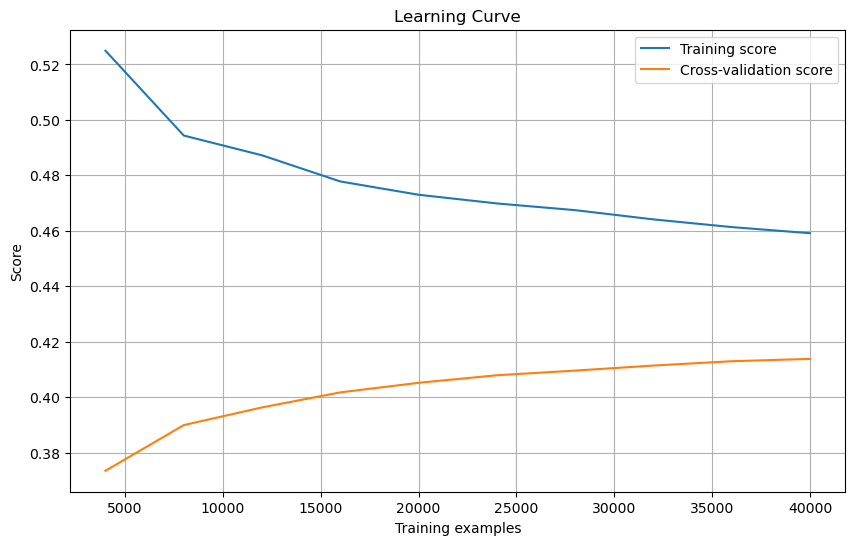

In [13]:
# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(model, train_data, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


### Plot

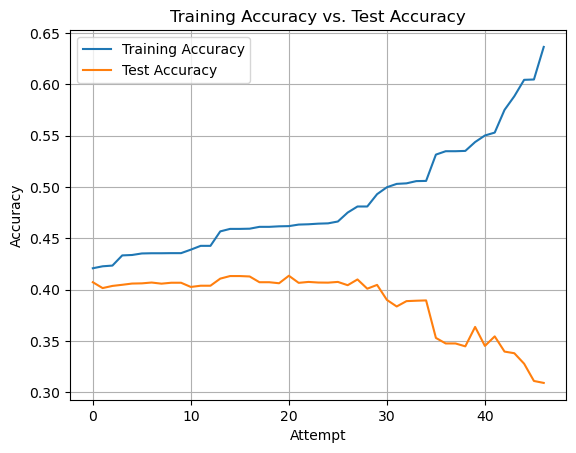

,Configuration,Test Accuracy,Training Accuracy
5,"C=0.0001, max_iter=15000, solver=lbfgs",0.4073,0.420900
24,"C=0.0001, max_iter=100000, solver=lbfgs",0.4016,0.422800
7,"C=0.0001, max_iter=18000, solver=lbfgs",0.4037,0.423500
33,"C=0.001, max_iter=100, solver=lbfgs",0.4048,0.433400
37,"C=0.001, max_iter=233, solver=lbfgs",0.4060,0.433800
32,"C=0.001, max_iter=1000000, solver=lbfgs",0.4062,0.435300
17,"C=1.0, max_iter=200, solver=lbfgs",0.4070,0.435500
19,"C=0.01, max_iter=1000, solver=lbfgs",0.4059,0.435500
30,"C=100, max_iter=50000, solver=lbfgs",0.4068,0.435600
18,"C=1.0, max_iter=1000, solver=lbfgs",0.4068,0.435600


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
results = [
    {"Configuration": "C=0.01, max_iter=1000, solver=saga", "Test Accuracy": 0.4047, "Training Accuracy": 0.4930},
    {"Configuration": "C=0.001, max_iter=2000, solver=lbfgs", "Test Accuracy": 0.4133, "Training Accuracy": 0.4592},
    {"Configuration": "C=0.001, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.4133, "Training Accuracy": 0.4592},
    {"Configuration": "C=0.001, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.4063, "Training Accuracy": 0.4617},
    {"Configuration": "C=0.001, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.4129, "Training Accuracy": 0.4594},
    {"Configuration": "C=0.0001, max_iter=15000, solver=lbfgs", "Test Accuracy": 0.4073, "Training Accuracy": 0.4209},
    {"Configuration": "C=0.001, max_iter=15000, solver=lbfgs", "Test Accuracy": 0.4136, "Training Accuracy": 0.4619},
    {"Configuration": "C=0.0001, max_iter=18000, solver=lbfgs", "Test Accuracy": 0.4037, "Training Accuracy": 0.4235},
    {"Configuration": "C=0.001, max_iter=20000, solver=lbfgs", "Test Accuracy": 0.4027, "Training Accuracy": 0.4390},
    {"Configuration": "C=0.001, max_iter=20000, solver=lbfgs", "Test Accuracy": 0.4073, "Training Accuracy": 0.4612},
    {"Configuration": "C=10, max_iter=20000, solver=lbfgs", "Test Accuracy": 0.3449, "Training Accuracy": 0.5351},
    {"Configuration": "C=0.001, max_iter=20000, solver=lbfgs", "Test Accuracy": 0.4073, "Training Accuracy": 0.4612},
    {"Configuration": "C=1, max_iter=50000, solver=lbfgs", "Test Accuracy": 0.3531, "Training Accuracy": 0.5315},
    {"Configuration": "C=10, max_iter=50000, solver=lbfgs", "Test Accuracy": 0.3477, "Training Accuracy": 0.5348},
    {"Configuration": "C=0.01, max_iter=50000, solver=lbfgs", "Test Accuracy": 0.3477, "Training Accuracy": 0.5348},
    {"Configuration": "C=0.01, max_iter=50000, solver=lbfgs", "Test Accuracy": 0.3112, "Training Accuracy": 0.6046},
    {"Configuration": "C=0.01, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.3893, "Training Accuracy": 0.5057},
    {"Configuration": "C=1.0, max_iter=200, solver=lbfgs", "Test Accuracy": 0.4070, "Training Accuracy": 0.4355},
    {"Configuration": "C=1.0, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.4068, "Training Accuracy": 0.4356},
    {"Configuration": "C=0.01, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.4059, "Training Accuracy": 0.4355},
    {"Configuration": "C=1, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.3398, "Training Accuracy": 0.5750},
    {"Configuration": "C=0.01, max_iter=1000, solver=sag", "Test Accuracy": 0.3896, "Training Accuracy": 0.5059},
    {"Configuration": "C=100, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.3093, "Training Accuracy": 0.6363},
    {"Configuration": "C=0.001, max_iter=100000, solver=lbfgs", "Test Accuracy": 0.4069, "Training Accuracy": 0.4646},
    {"Configuration": "C=0.0001, max_iter=100000, solver=lbfgs", "Test Accuracy": 0.4016, "Training Accuracy": 0.4228},
    {"Configuration": "C=0.002, max_iter=5000, solver=lbfgs", "Test Accuracy": 0.4100, "Training Accuracy": 0.4810},
    {"Configuration": "C=0.003, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.4010, "Training Accuracy": 0.4810},
    {"Configuration": "C=0.002, max_iter=5000, solver=lbfgs", "Test Accuracy": 0.4044, "Training Accuracy": 0.4751},
    {"Configuration": "C=0.0012, max_iter=12345, solver=lbfgs", "Test Accuracy": 0.4076, "Training Accuracy": 0.4664},
    {"Configuration": "C=0.001, max_iter=10000, solver=lbfgs", "Test Accuracy": 0.4070, "Training Accuracy": 0.4643},
    {"Configuration": "C=100, max_iter=50000, solver=lbfgs", "Test Accuracy": 0.4068, "Training Accuracy": 0.4356},
    {"Configuration": "C=100, max_iter=1000000, solver=lbfgs", "Test Accuracy": 0.3453, "Training Accuracy": 0.5501},
    {"Configuration": "C=0.001, max_iter=1000000, solver=lbfgs", "Test Accuracy": 0.4062, "Training Accuracy": 0.4353},
    {"Configuration": "C=0.001, max_iter=100, solver=lbfgs", "Test Accuracy": 0.4048, "Training Accuracy": 0.4334},
    {"Configuration": "C=0.001, max_iter=100, solver=lbfgs", "Test Accuracy": 0.4076, "Training Accuracy": 0.4637},
    {"Configuration": "C=0.001, max_iter=99999, solver=lbfgs", "Test Accuracy": 0.4067, "Training Accuracy": 0.4634},
    {"Configuration": "C=0.01, max_iter=2345, solver=lbfgs", "Test Accuracy": 0.4039, "Training Accuracy": 0.4427},
    {"Configuration": "C=0.001, max_iter=233, solver=lbfgs", "Test Accuracy": 0.4060, "Training Accuracy": 0.4338},
    {"Configuration": "C=0.01, max_iter=233, solver=lbfgs", "Test Accuracy": 0.4039, "Training Accuracy": 0.4427},
    {"Configuration": "C=0.1, max_iter=233, solver=saga", "Test Accuracy": 0.3837, "Training Accuracy": 0.5030},
    {"Configuration": "C=0.01, max_iter=100, solver=saga", "Test Accuracy": 0.3901, "Training Accuracy": 0.499733},
    {"Configuration": "C=0.01, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.3889, "Training Accuracy": 0.503533},
    {"Configuration": "C=0.10, max_iter=1000, solver=lbfgs", "Test Accuracy": 0.3638, "Training Accuracy": 0.543733},
    {"Configuration": "C=1.00, max_iter=2000, solver=lbfgs", "Test Accuracy": 0.3382, "Training Accuracy": 0.588300},
    {"Configuration": "C=10.00, max_iter=2000, solver=lbfgs", "Test Accuracy": 0.3280, "Training Accuracy": 0.604267},
    {"Configuration": "C=0.001, max_iter=5000, solver=lbfgs", "Test Accuracy": 0.4108, "Training Accuracy": 0.456775},
    {"Configuration": "C=1, max_iter=5000, solver=lbfgs", "Test Accuracy": 0.3546, "Training Accuracy": 0.552925}
]

results_df = pd.DataFrame(results)

# Sort the DataFrame by Training Accuracy
results_df = results_df.sort_values(by="Training Accuracy", ascending=True)

# Plot the accuracy results

plt.plot(results_df['Training Accuracy'].values, label='Training Accuracy')
plt.plot(results_df['Test Accuracy'].values, label='Test Accuracy')
plt.title('Training Accuracy vs. Test Accuracy')
plt.xlabel('Attempt')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

results_df